In [19]:
import csv

# Initialize variables to store data
data = []
current_precinct = None

# Read the text file line by line
with open('formatted_text_update2.txt', 'r') as file:
    for line in file:
        line = line.strip()  # Remove leading/trailing whitespaces
        if line.startswith("Precinct "):
            # A new precinct, save the current precinct
            if current_precinct is not None:
                data.append(current_precinct)
            current_precinct = {"Precinct": line.split("Precinct ")[1]}
        elif line.startswith(("Jarrett", "David", "John", "Dominque")):
            # Candidate data
            parts = line.split()
            candidate_name = " ".join(parts[:-2])
            try:
                # Remove commas from the numbers before converting
                votes = int(parts[-2].replace(',', ''))
                percentage = float(parts[-1][:-1])  # Remove the '%' sign
                # Add separate "Votes" and "Percentage" columns for each candidate
                current_precinct[f"{candidate_name} Votes"] = votes
                current_precinct[f"{candidate_name} Percentage"] = percentage
            except ValueError:
                # Handle the case where the last part doesn't contain a valid integer for votes
                pass
        elif line.startswith("Total Votes Cast"):
            # Total Votes Cast
            parts = line.split()
            try:
                # Remove commas from the numbers before converting
                total_votes = int(parts[-2].replace(',', ''))
                current_precinct["Total Votes Cast"] = total_votes
            except ValueError:
                # Handle the case where the last part doesn't contain a valid integer
                pass

# Append the last precinct
if current_precinct is not None:
    data.append(current_precinct)

# Define the CSV file name
csv_file = 'formatted_df.csv'

# Write the data to a CSV file
with open(csv_file, 'w', newline='') as csvfile:
    fieldnames = ["Precinct", "Jarrett Lipman Votes", "Jarrett Lipman Percentage", 
                  "David Allan Lara Votes", "David Allan Lara Percentage", 
                  "John Courage Votes", "John Courage Percentage", 
                  "Dominque Lui Votes", "Dominque Lui Percentage", 
                  "Total Votes Cast"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()  # Write the CSV header
    for precinct in data:
        writer.writerow(precinct)

# Read the CSV file into a DataFrame
import pandas as pd

df = pd.read_csv(csv_file)

# Display the DataFramed
df

,Precinct,Jarrett Lipman Votes,Jarrett Lipman Percentage,David Allan Lara Votes,David Allan Lara Percentage,John Courage Votes,John Courage Percentage,Dominque Lui Votes,Dominque Lui Percentage,Total Votes Cast
0,3001,159,21.96,38,5.25,492,67.96,35,4.83,724
1,3007,245,39.71,28,4.54,319,51.70,25,4.05,617
2,3030,200,27.62,33,4.56,475,65.61,16,2.21,724
3,3033,136,26.41,34,6.60,333,64.66,12,2.33,515
4,3037,32,7.27,21,8.18,65,4.55,0,0.00,11
5,3042,152,28.20,24,4.45,339,62.89,24,4.45,539
6,3044,88,22.86,23,5.97,251,65.19,23,5.97,385
7,3045,113,24.78,14,3.07,307,67.32,22,4.82,456
8,3052,66,26.19,16,6.35,160,63.49,10,3.97,252
9,3059,122,34.37,24,6.76,185,52.11,24,6.76,355


In [20]:
total_votes = df["Total Votes Cast"].sum()
total_votes

23688

In [26]:
lipman_votes = df["Jarrett Lipman Votes"].sum()
lipman_votes

6375

In [21]:
lipman_avg_votes = df["Jarrett Lipman Votes"].mean()
lipman_avg_votes

138.58695652173913

In [23]:
lipman_avg_percentage = df["Jarrett Lipman Percentage"].mean()
lipman_avg_percentage

28.295434782608694

In [24]:
lipman_top_precinct = df.loc[df["Jarrett Lipman Votes"].idxmax()]
lipman_top_precinct

Precinct                       3165.00
Jarrett Lipman Votes            531.00
Jarrett Lipman Percentage        48.99
David Allan Lara Votes           45.00
David Allan Lara Percentage       4.15
John Courage Votes              468.00
John Courage Percentage          43.17
Dominque Lui Votes               40.00
Dominque Lui Percentage           3.69
Total Votes Cast               1084.00
Name: 41, dtype: float64

In [25]:
lipman_lowest_precinct = df.loc[df["Jarrett Lipman Votes"].idxmin()]
lipman_lowest_precinct

Precinct                       3062.0
Jarrett Lipman Votes              2.0
Jarrett Lipman Percentage        40.0
David Allan Lara Votes            0.0
David Allan Lara Percentage       0.0
John Courage Votes                3.0
John Courage Percentage          60.0
Dominque Lui Votes                0.0
Dominque Lui Percentage           0.0
Total Votes Cast                  5.0
Name: 10, dtype: float64

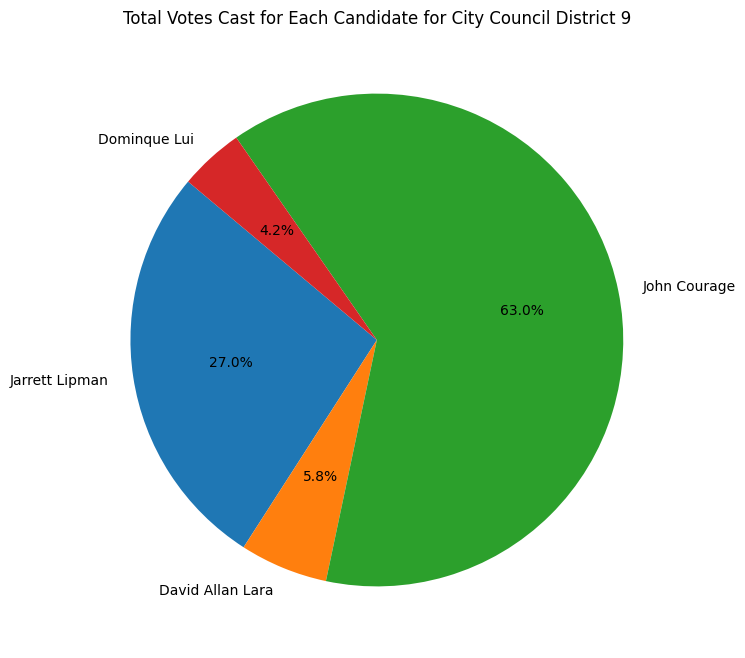

: 

In [36]:
import matplotlib.pyplot as plt

# Candidate names and corresponding column names
candidates = ['Jarrett Lipman', 'David Allan Lara', 'John Courage', 'Dominque Lui']
vote_columns = ['Jarrett Lipman Votes', 'David Allan Lara Votes', 'John Courage Votes', 'Dominque Lui Votes']

# Calculate the total votes for each candidate
total_votes = [df[column].sum() for column in vote_columns]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_votes, labels=candidates, autopct='%1.1f%%', startangle=140)
plt.title('Total Votes Cast for Each Candidate for City Council District 9')
plt.show()


In [35]:
import plotly.graph_objects as go

# Candidate names and corresponding column names
candidates = ['Jarrett Lipman', 'David Allan Lara', 'John Courage', 'Dominque Lui']
vote_columns = ['Jarrett Lipman Votes', 'David Allan Lara Votes', 'John Courage Votes', 'Dominque Lui Votes']

# Calculate the total votes for each candidate
total_votes = [df[column].sum() for column in vote_columns]

# Define custom colors for each candidate
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a Plotly bar chart
fig = go.Figure()

for candidate, votes, color in zip(candidates, total_votes, colors):
    fig.add_trace(go.Bar(x=[candidate], y=[votes], text=[votes], textposition='outside', marker_color=color, showlegend=False))

fig.update_layout(title='Total Votes Cast for Each Candidate', xaxis_tickangle=-45)

# Adjust the height of the graph
fig.update_layout(height=600)

# Show the interactive chart
fig.show()